Working of Elitzur–Vaidman bomb tester explained using IBM qiskit sdk. This code is created in response to IBM's qiskit video uploaded on same topic https://www.youtube.com/watch?v=fus1nJ6JaTk&t=401s. Hope it helps in understanding the various aspects on this experiment.

In the code below CNOT gate is used to represent a live vaidman bomb. first qubit holds the photon path information while the second qubit learns the first qubit’s state (photon’s path information) via CNOT (entangling gate) and acts as a measuring device. The presence of measurement/CNOT gate disturbs the smooth interference in first qubit where two subsequent Hadamard cancels out the component of state |1⟩. Due to the presence of bomb (measurement / decoherence), the system of two qubits can best described with just one wave function with four possible eigenvalues.

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, BasicAer, execute
from qiskit.visualization import plot_histogram 
import numpy as np

Mentioned below are few circuits that explains the gates setup for various possibilities of bomb to be in live or dud states. 

In [3]:
# Let's start with no bomb
Vaidman_bombtest_circuit = QuantumCircuit(2)
Vaidman_bombtest_circuit.h(0)
# 1st Hadamard gate puts 1st qubit in superpositon of |0⟩ and |1⟩  
Vaidman_bombtest_circuit.h(0)
# second Hadamard gate cancels out (destructively interfere) the |1⟩ state leaving a |0⟩ in 1st qubit
Vaidman_bombtest_circuit.measure_all()
Vaidman_bombtest_circuit.draw()

┌───┐┌───┐ ░ ┌─┐   
   q_0: ┤ H ├┤ H ├─░─┤M├───
        └───┘└───┘ ░ └╥┘┌─┐
   q_1: ───────────░──╫─┤M├
                   ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1

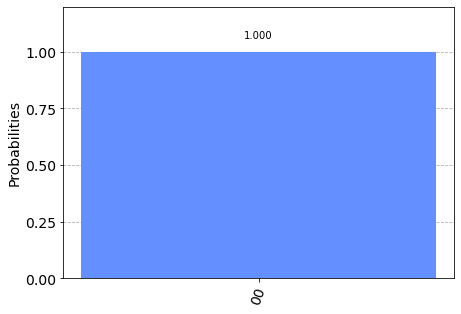

In [75]:
bkend = BasicAer.get_backend('qasm_simulator')
job = execute(Vaidman_bombtest_circuit, bkend, shots=1000)
counts = job.result().get_counts(Vaidman_bombtest_circuit)
plot_histogram(counts)

In [76]:
Vaidman_bombtest_circuit = QuantumCircuit(3,3)
# The 1st (LSB) is the bomb control qubit, we can change the rotation around Y axis from 0 to pi to increase chances of live bomb  
# Rotation of pi/2 is used for 50%-50% chances of bomb as live or dud in this probabilty of finding bomb wihtout exploding
# is 12.5% count correspond to outcome of 011 (01 in qubits 2 and 3  when bomb is live) 
Vaidman_bombtest_circuit.ry(np.pi/2,0)  
Vaidman_bombtest_circuit.h(1)
Vaidman_bombtest_circuit.ccx(0,1,2)
Vaidman_bombtest_circuit.h(1)
#Vaidman_bombtest_circuit.measure([1,2],[0,1])
Vaidman_bombtest_circuit.measure([0,1,2],[0,1,2])
Vaidman_bombtest_circuit.draw()

┌─────────┐          ┌─┐   
q_0: ┤ RY(π/2) ├──■───────┤M├───
     └──┬───┬──┘  │  ┌───┐└╥┘┌─┐
q_1: ───┤ H ├─────■──┤ H ├─╫─┤M├
        └───┘   ┌─┴─┐└┬─┬┘ ║ └╥┘
q_2: ───────────┤ X ├─┤M├──╫──╫─
                └───┘ └╥┘  ║  ║ 
c: 3/══════════════════╩═══╩══╩═
                       2   0  1

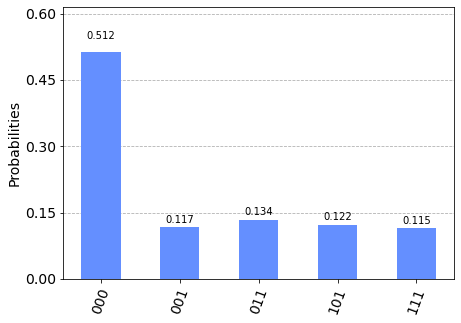

In [77]:
bkend = BasicAer.get_backend('qasm_simulator')
job = execute(Vaidman_bombtest_circuit, bkend, shots=1000)
counts = job.result().get_counts(Vaidman_bombtest_circuit)
plot_histogram(counts)

In [4]:
# In case all the bombs are live bomb we can remove the 1st qubit and work with just two 
Vaidman_bombtest_circuit = QuantumCircuit(2)
Vaidman_bombtest_circuit.h(0)

# in CNOT below second qubit measures the states in 1st qubit, there is 50% chance of measuring state |1⟩ and bomb exploding  
Vaidman_bombtest_circuit.cx(0,1)

# The outcome of any operations on 1st qubit will remain entangled with second qubit as it has now become one system of
# two qubits, that is described by one wave function.
# Also if we consider entanglement as measurement, when it measures a |0⟩ in second qubit, it denotes collapse of 1st 
# qubit to |0⟩ path, and leave no |1⟩ component to interfere with upper path at next Hadamard operation, this qubit 
# then have equal probability to collapse to either |0⟩ or |1⟩  
Vaidman_bombtest_circuit.h(0)
Vaidman_bombtest_circuit.measure_all()
Vaidman_bombtest_circuit.draw()

┌───┐     ┌───┐ ░ ┌─┐   
   q_0: ┤ H ├──■──┤ H ├─░─┤M├───
        └───┘┌─┴─┐└───┘ ░ └╥┘┌─┐
   q_1: ─────┤ X ├──────░──╫─┤M├
             └───┘      ░  ║ └╥┘
meas: 2/═══════════════════╩══╩═
                           0  1

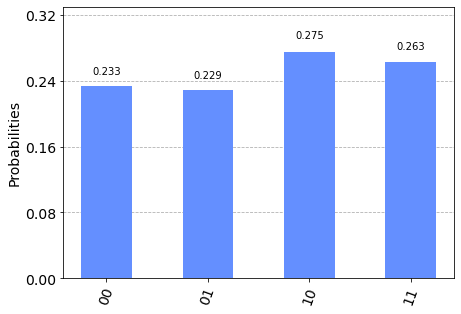

In [5]:
bkend = BasicAer.get_backend('qasm_simulator')
job = execute(Vaidman_bombtest_circuit, bkend, shots=1000)
counts = job.result().get_counts(Vaidman_bombtest_circuit)
plot_histogram(counts)

In [6]:
Vaidman_bombtest_circuit = QuantumCircuit(3)
Vaidman_bombtest_circuit.h(0)
Vaidman_bombtest_circuit.cx(1,2) 
#Vaidman_bombtest_circuit.ch(2,1)
Vaidman_bombtest_circuit.measure_all()
Vaidman_bombtest_circuit.draw()

┌───┐ ░ ┌─┐      
   q_0: ┤ H ├─░─┤M├──────
        └───┘ ░ └╥┘┌─┐   
   q_1: ──■───░──╫─┤M├───
        ┌─┴─┐ ░  ║ └╥┘┌─┐
   q_2: ┤ X ├─░──╫──╫─┤M├
        └───┘ ░  ║  ║ └╥┘
meas: 3/═════════╩══╩══╩═
                 0  1  2

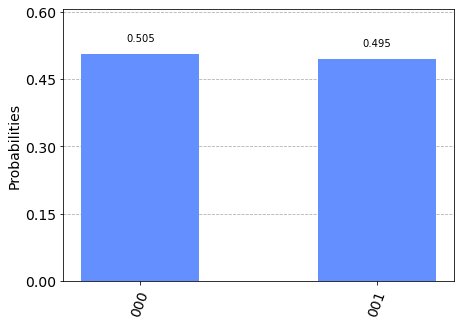

In [7]:
bkend = BasicAer.get_backend('qasm_simulator')
job = execute(Vaidman_bombtest_circuit, bkend, shots=1000)
counts = job.result().get_counts(Vaidman_bombtest_circuit)
plot_histogram(counts)

In [3]:

iterations = 8
bomb_circuit = QuantumCircuit(2, 9)

for i in range(iterations-1) :
    bomb_circuit.ry(np.pi/8, 0)
    bomb_circuit.cx(0,1) # cx gate is bomb that we need to detect, comment this line for no bomb condition
    #use zeno effect to collapse state of 1st qubit to |0> most of the time. 
    bomb_circuit.measure([1], [i+1])
    bomb_circuit.reset(1)

bomb_circuit.ry(np.pi/8, 0)
bomb_circuit.measure([0], [0])
bomb_circuit.draw()


┌─────────┐     ┌─────────┐          ┌─────────┐          ┌─────────┐     »
q_0: ┤ RY(π/8) ├──■──┤ RY(π/8) ├───────■──┤ RY(π/8) ├───────■──┤ RY(π/8) ├─────»
     └─────────┘┌─┴─┐└───┬─┬───┘     ┌─┴─┐└───┬─┬───┘     ┌─┴─┐└───┬─┬───┘     »
q_1: ───────────┤ X ├────┤M├─────|0>─┤ X ├────┤M├─────|0>─┤ X ├────┤M├─────|0>─»
                └───┘    └╥┘         └───┘    └╥┘         └───┘    └╥┘         »
c: 9/═════════════════════╩════════════════════╩════════════════════╩══════════»
                          1                    2                    3          »
«          ┌─────────┐          ┌─────────┐          ┌─────────┐          »
«q_0: ──■──┤ RY(π/8) ├───────■──┤ RY(π/8) ├───────■──┤ RY(π/8) ├───────■──»
«     ┌─┴─┐└───┬─┬───┘     ┌─┴─┐└───┬─┬───┘     ┌─┴─┐└───┬─┬───┘     ┌─┴─┐»
«q_1: ┤ X ├────┤M├─────|0>─┤ X ├────┤M├─────|0>─┤ X ├────┤M├─────|0>─┤ X ├»
«     └───┘    └╥┘         └───┘    └╥┘         └───┘    └╥┘         └───┘»
«c: 9/══════════╩════════════════════╩════════════════════╩═══════════════»
«               4                    5                    6               »
«     ┌─────────┐     ┌─┐
«q_0: ┤ RY(π/8) ├─────┤M├
«     └───┬─┬───┘     └╥┘
«q_1: ────┤M├─────|0>──╫─
«         └╥┘          ║ 
«c: 9/═════╩═══════════╩═
«          7           0

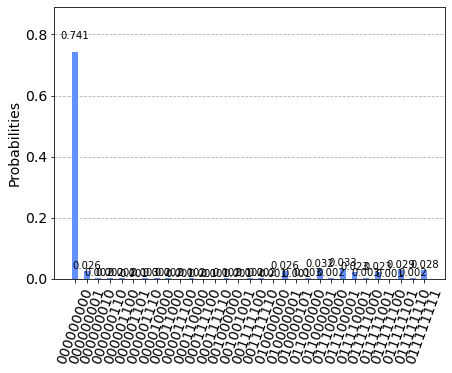

In [4]:
bkend = BasicAer.get_backend('qasm_simulator')
job = execute(bomb_circuit, bkend, shots=1000)
counts = job.result().get_counts(bomb_circuit)
plot_histogram(counts)

In [7]:
bomb_circuit = QuantumCircuit(2)
bomb_circuit.ry(np.pi/6, 0)
bomb_circuit.cx(0,1) # cx gate is bomb that we need to detect
bomb_circuit.h(0)
bomb_circuit.measure_all()
bomb_circuit.draw()

┌─────────┐     ┌───┐ ░ ┌─┐   
   q_0: ┤ RY(π/6) ├──■──┤ H ├─░─┤M├───
        └─────────┘┌─┴─┐└───┘ ░ └╥┘┌─┐
   q_1: ───────────┤ X ├──────░──╫─┤M├
                   └───┘      ░  ║ └╥┘
meas: 2/═════════════════════════╩══╩═
                                 0  1

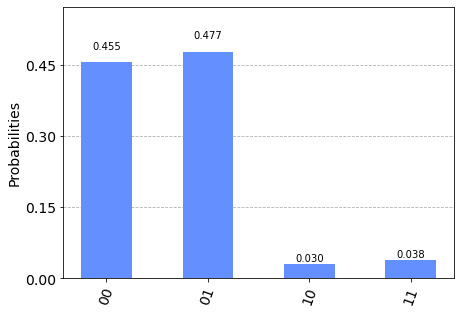

In [8]:
bkend = BasicAer.get_backend('qasm_simulator')
job = execute(bomb_circuit, bkend, shots=1000)
counts = job.result().get_counts(bomb_circuit)
plot_histogram(counts)

In [ ]:
# In another case  when CX is not there, then doing a hadamard on superposition state will take it to an angle of 60 
# & chances of it collapsing to zero will be around a quarter.  
bomb_circuit = QuantumCircuit(2)
bomb_circuit.ry(np.pi/6, 0)
bomb_circuit.h(0)
bomb_circuit.measure_all()

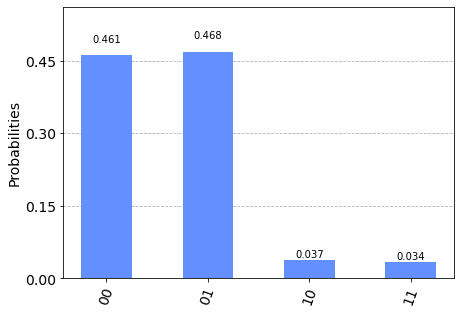

In [9]:
# probability of detecting bomb wihtout exploding is increased by almost 25% while exploding is very low, however in this 
# case a measurement of |1> on 1st qubit is not unique as it was in case of detecting bomb/measurement device with 
# Hadamard gate (instead of ry(pi/6) used to obtain equal superspotion in first place. 

bkend = BasicAer.get_backend('qasm_simulator')
job = execute(bomb_circuit, bkend, shots=1000)
counts = job.result().get_counts(bomb_circuit)
plot_histogram(counts)

In [12]:
from qiskit.circuit.library import CCXGate, RXGate
import numpy as np

# Circuit modified to representing Vaidman bomb with help of a XOR + Controlled hadamard gate.  

def q_sweeper(cycles) :
    qr = QuantumRegister(3, 'q')
    cr = ClassicalRegister(cycles+1, 'c')
    qc = QuantumCircuit(qr, cr)
#   qc.h(qr[0])  # comment this line to create a  no bomb circuit
#   qc.x(qr[0])  # comment previous line and uncomment this line to create abomb circuit

    for cycle in range(cycles-1):
        qc.append(RXGate(theta), [qr[1]])
        qc.ccx(qr[0], qr[1], qr[2]) 
#        qc.ch(qr[2],qr[1])
        qc.measure(qr[2],cr[cycle])
        if cycle < cycles-1:
            qc.reset(qr[2])
        
    qc.append(RXGate(theta), [qr[1]])
    qc.measure(qr[1],cr[cycles-1])
    qc.measure(qr[0],cr[cycles])
    return qc

successes = 0 # We will use this variable to track the number of successful predictions in a row
cycles = 6
theta = np.pi/cycles

zeno_circuit = q_sweeper(cycles)
zeno_circuit.draw()

»
q_0: ─────────────■────────────────────■────────────────────■──────────────────»
     ┌─────────┐  │  ┌─────────┐       │  ┌─────────┐       │  ┌─────────┐     »
q_1: ┤ RX(π/6) ├──■──┤ RX(π/6) ├───────■──┤ RX(π/6) ├───────■──┤ RX(π/6) ├─────»
     └─────────┘┌─┴─┐└───┬─┬───┘     ┌─┴─┐└───┬─┬───┘     ┌─┴─┐└───┬─┬───┘     »
q_2: ───────────┤ X ├────┤M├─────|0>─┤ X ├────┤M├─────|0>─┤ X ├────┤M├─────|0>─»
                └───┘    └╥┘         └───┘    └╥┘         └───┘    └╥┘         »
c: 7/═════════════════════╩════════════════════╩════════════════════╩══════════»
                          0                    1                    2          »
«                                          ┌─┐        
«q_0: ──■────────────────────■─────────────┤M├────────
«       │  ┌─────────┐       │  ┌─────────┐└╥┘     ┌─┐
«q_1: ──■──┤ RX(π/6) ├───────■──┤ RX(π/6) ├─╫──────┤M├
«     ┌─┴─┐└───┬─┬───┘     ┌─┴─┐└───┬─┬───┘ ║      └╥┘
«q_2: ┤ X ├────┤M├─────|0>─┤ X ├────┤M├─────╫──|0>──╫─
«     └───┘    └╥┘         └───┘    └╥┘     ║       ║ 
«c: 7/══════════╩════════════════════╩══════╩═══════╩═
«               3                    4      6       5

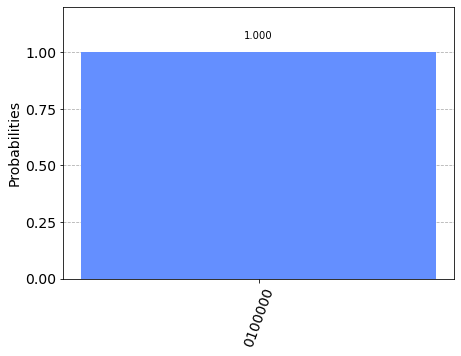

In [11]:
simulator = BasicAer.get_backend('qasm_simulator')
qsweeper_job = execute(zeno_circuit, simulator, shots=1000)
qsweeper_result = qsweeper_job.result()
qsweeper_counts = qsweeper_result.get_counts(zeno_circuit)

plot_histogram(qsweeper_counts)

In [ ]:
# end of program